# Ejercicio 10 - Guia 0

Este ejercicio es una constatación experimental del Teorema central del Límite.

## Punto (a)

Considerar dos observaciones $x_1$ y $x_2$ de variables aleatorias $X_1$ y $X_2$  independientes con distribución exponencial con parámetro $\lambda = 1/2$ y guardar el promedio de ambas, es decir, $\widehat{x}_2$. Repetir este proceso 1000 veces y apartir de los valores obtenidos, realizar un histograma

### Desarrollo

Importo la librería Scipy e inicializo la función exponencial con $\lambda = 1/2$

In [1]:
from scipy.stats import expon

exponencial = expon(scale=2)

Defino una función que tome como argumento una distribucion, calcule el promedio de 2 variables aleatorias de la misma y calcule el promedio.

In [12]:
def media_dosva(distribucion) -> float:
    # Genera dos muestras y hace el promedio entre las mismas
    valores = distribucion.rvs(2).mean()
    return valores

Ahora, hago este experimento 10.000 veces y lo guardo en una lista

In [13]:
medias_muestrales = [media_dosva(n, exponencial) for n in range(1,10000)]

Genero un gráfico de histograma con las 10.000 muestras

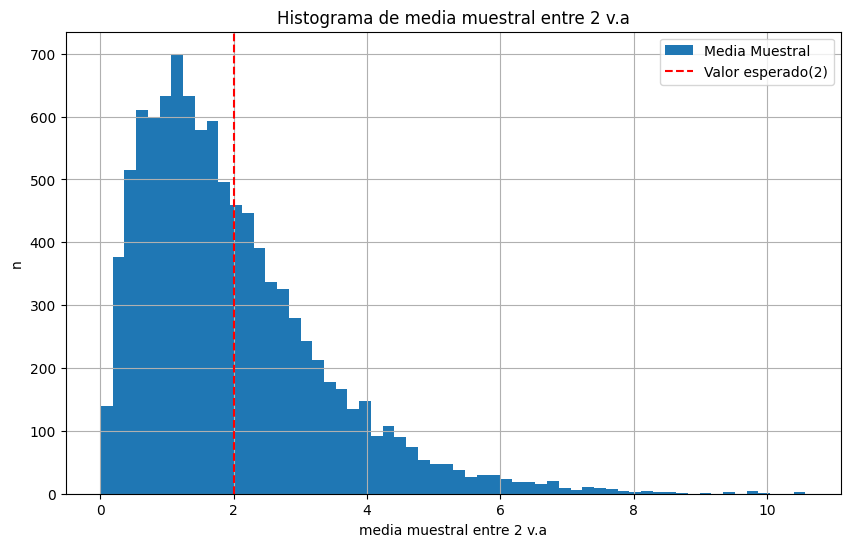

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(medias_muestrales, bins=60, label="Media Muestral")
plt.axvline(x=2,color='r',linestyle='--', label="Valor esperado(2)")
plt.xlabel('media muestral entre 2 v.a')
plt.ylabel('n')
plt.title('Histograma de media muestral entre 2 v.a')
plt.legend()
plt.grid(True)
plt.show()


## Punto (b)

Aumentar a diez las variables promediadas, es decir, considerar ahora $n=10$ observaciones de variables aleatorias independientes con la misma distribución del ítem anterior. Repetir este proceso 1000 veces y a partir de los valores obtenidos, realizar un histograma.

## Desarrollo

Redefino la función anterior para poder configurar la cantidad de **Random Variates Sample** (rvs)

In [22]:
def media_nva(n: int, distribucion) -> float:
    # Genera dos muestras y hace el promedio entre las mismas
    valores = distribucion.rvs(n).mean()
    return valores

Ahora si, repito 10.000 veces la funcion con el n pedido.

In [25]:
medias_muestrales_b = [media_nva(10,exponencial) for i in range(1,10000)]

Realizo el graáfico del punto anterior pero con estos nuevos valores.

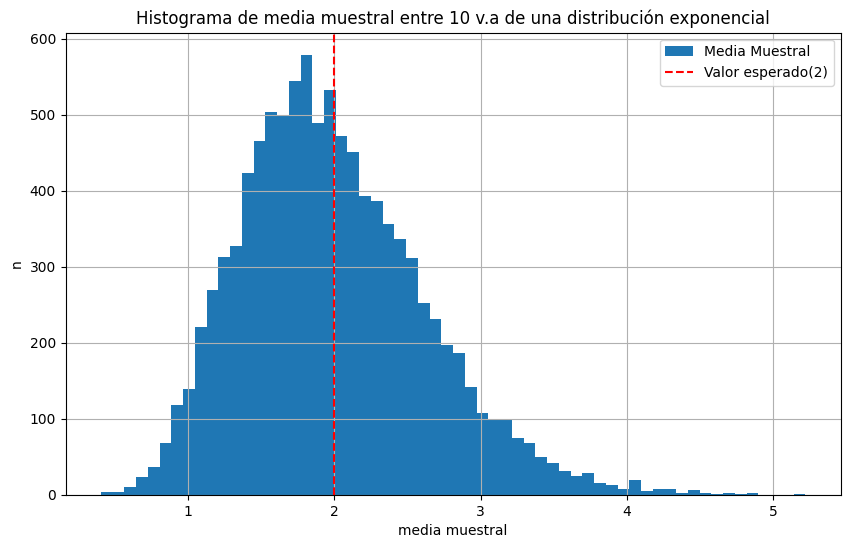

In [28]:
plt.figure(figsize=(10,6))
plt.hist(medias_muestrales_b, bins=60, label="Media Muestral")
plt.axvline(x=2,color='r',linestyle='--', label="Valor esperado(2)")
plt.xlabel('media muestral')
plt.ylabel('n')
plt.title('Histograma de media muestral entre 10 v.a de una distribución exponencial')
plt.legend()
plt.grid(True)
plt.show()

## Punto (c)

 Hacer histogramas para $n=100$ y $n=1000$. Encontrar parámetros $\mu$ y $\theta$ para que la PDF de una $N(\mu,\theta)$ se superponga lo mejor posible al histograma que corresponde a $n=1000$

### Desarrollo

Utilizo la función del anterior punto y guardo en listas diferentes la de n = 100 y la de n = 1000

In [30]:
medias_muestrales_100 = [media_nva(100,exponencial) for i in range(1,10000)]
medias_muestrales_1000 = [media_nva(1000,exponencial) for i in range(1,10000)]

El gráfico muestra que, aunque el experimento se repita la misma cantidad de veces (10.000), a medida que el tamaño de la muestra (n) aumenta, la distribución se aproxima a una normal y converge a 2, que es la media de nuestra distribución exponencial."

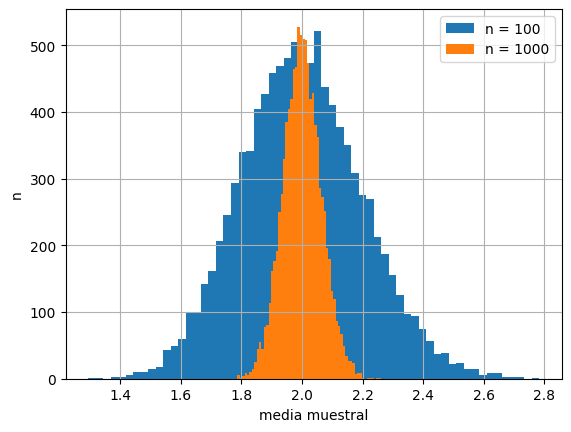

In [37]:
plt.hist(medias_muestrales_100, bins=60, label="n = 100")
plt.hist(medias_muestrales_1000, bins=60, label="n = 1000")
plt.xlabel('media muestral')
plt.ylabel('n')
plt.legend()
plt.grid(True)
plt.show()

Ahora, voy a estimar los parametro $\mu$ y $\theta$ de la normal que se ha generado tras este experimento de $n = 1000$ y voy a superponerla encima del gráfico.

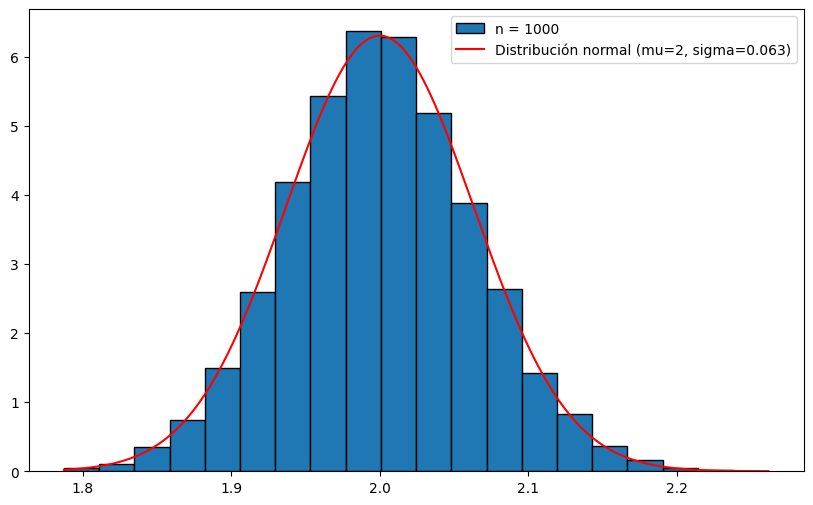

In [42]:
import numpy as np
from scipy.stats import norm

# Realizo el histograma solo con n = 1000

plt.figure(figsize=(10,6))
count, bins, ignored = plt.hist(medias_muestrales_1000, bins=20, label="n = 1000",density=True, edgecolor='black')

# Calculo los parámetros de la distribución normal

mu = 2
sigma = np.sqrt(4/1000)

# Superpongo la curva de la distribución normal
x = np.linspace(min(bins), max(bins), 1000)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r-', label='Distribución normal (mu=2, sigma=0.063)')
plt.legend()
plt.show()